In [19]:
# Lasciate questa cella così ogni volta che aggiornate un file python, 
# anche gli import nel notebook vengono aggiornati

%load_ext autoreload
%autoreload 2

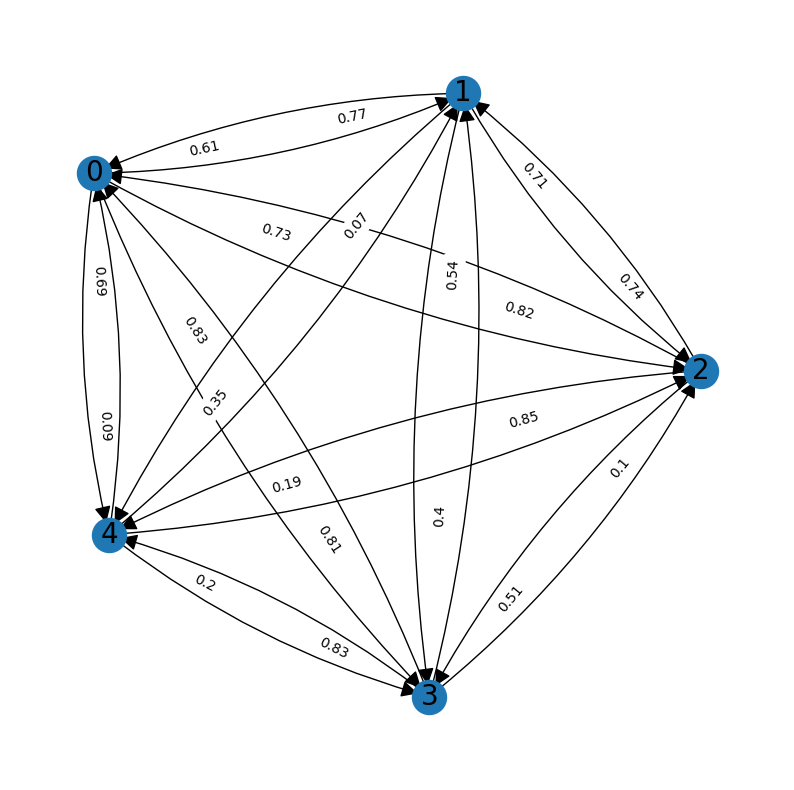

In [22]:
from Simulation import *


click_probabilities = generate_click_probabilities(fully_connected=True)
observations_probabilities = generate_observation_probabilities(click_probabilities=click_probabilities)

concentration_params = [100] + [70] * NUM_OF_PRODUCTS
alpha_users = np.random.dirichlet( alpha= concentration_params, size = 1)


product_prices, users_reservation_prices = generate_prices(product_range=100, users_range=100)

env = Environment(users_reservation_prices = users_reservation_prices,
                    product_prices = product_prices,
                    click_probabilities = click_probabilities,
                    observations_probabilities = observations_probabilities,
                    tot_num_users = 100)

Network.print_graph(G=env.network.G)

In [23]:
env.get_product_prices()

array([72.81, 77.38, 37.18,  4.65, 20.96])

In [34]:
from social_influence import *
nodes_activation_probabilities = montecarlo_sampling(env)

k: 100%|██████████| 4688/4688 [00:02<00:00, 1578.59it/s]


In [77]:
B_cap = 200
budgets = np.arange(start = 0, stop = B_cap+1, step = B_cap/10)
tot_num_users = np.random.normal(loc = 1000, scale=25)


# -----------STEP 2------------
ecomm2 = Ecommerce_step2(B_cap = B_cap, budgets = budgets, tot_num_users = tot_num_users)


In [78]:
from Ecommerce_step2 import Ecommerce_step2
from Environment import *

In [79]:

ecomm2.solve_optimization_problem(env = env, nodes_activation_probabilities= nodes_activation_probabilities)

[[  0.          13.47903038  26.97529488  41.5618014   48.35919675
   58.43259333  73.81841805 128.36779665 143.34248982 133.99508863
  139.53058781]
 [  0.          15.91279428  40.45386883  49.31887209  78.80854871
  140.         140.         140.         140.         140.
  140.        ]
 [  0.          14.37790288  15.89541359  30.01984775  40.89945353
   43.55682818 125.99546276 132.26579124 123.42799873 126.12521105
  131.85104433]
 [  0.          11.67330675  25.09202912  40.61558773  46.35533681
  128.07860776 130.         130.         130.         130.
  126.23071632]
 [  0.          16.79421991  35.44266901  46.14965639  60.19385222
   75.6675711  100.88609152 125.95398015 130.         130.
  130.        ]]
optimal solution found is: [  0. 100.   0. 100.   0.]
